In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = 'MS Gothic'

In [2]:
json_files = [file for file in os.listdir('.') if file.endswith('.json')]
dfs = [pd.read_json(file) for file in json_files]
df = pd.concat(dfs, ignore_index=True)

In [3]:
df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%dT%H:%M:%SZ')
df = df[df.episode_name.isnull()]
df = df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped']]
df = df.rename(columns={'master_metadata_track_name':'track_name', 'master_metadata_album_artist_name':'album_artist_name', 'master_metadata_album_album_name':'album_album_name'})

In [4]:
df.head()

,ts,ms_played,track_name,album_artist_name,album_album_name,reason_start,reason_end,shuffle,skipped
0,2011-02-02 14:56:35,48647,Mecha Love (Album Version),Hadouken!,Mecha Love,clickrow,endplay,False,True
1,2011-02-13 19:24:21,90829,Phenomenon,LL COOL J,Phenomenon,clickrow,clickrow,False,True
2,2011-02-13 19:27:07,68811,What's The Use?,Jamie Lidell,Multiply,clickrow,clickrow,False,True
3,2011-02-13 19:31:34,0,Certified,Calvin Harris,I Created Disco,clickrow,clickrow,False,True
4,2011-02-13 19:31:45,0,Certified,Calvin Harris,I Created Disco,popup,clickrow,False,True


In [5]:
print('Unique values per column')
for col in ['ts', 'track_name', 'album_artist_name', 'album_album_name']:
    print(f'{col.ljust(18)}: {df[col].nunique()}')

Unique values per column
ts                : 27328
track_name        : 17869
album_artist_name : 10395
album_album_name  : 15571


In [6]:
df.ms_played.sum()/1000/60/60/24

np.float64(51.1531271412037)

In [7]:
# df.reason_start.value_counts()
# df.reason_end.value_counts()

In [8]:
top_artists_all_time = (df[['album_artist_name','ms_played']].groupby('album_artist_name').sum().sort_values('ms_played', ascending=False)/1000/60).reset_index()[:50]['album_artist_name'].to_list()
print(top_artists_all_time)

['Above & Beyond', 'Cory Allen', 'NewJeans', 'Putumayo', 'Alexander Popov', 'RÜFÜS DU SOL', 'Hans Zimmer', 'TWICE', 'Kyau & Albert', 'Red Hot Chili Peppers', 'Sub Focus', 'Aly & Fila', 'Ludovico Einaudi', 'LE SSERAFIM', 'Linkin Park', 'Solarstone', 'Disclosure', 'IVE', 'Camo & Krooked', 'No Brain', 'Infected Mushroom', 'Ambience Mastery', 'ITZY', 'Red Velvet', 'Cosmic Gate', 'Arctic Monkeys', 'Lindsey Stirling', 'Tiësto', 'Foo Fighters', 'aespa', 'Thomas Bergersen', 'The Prodigy', 'Rise Against', 'Paramore', 'Cannons', 'Bonobo', 'AURORA', 'Enya', 'Mat Zo', 'YOASOBI', 'Maduk', 'KhoMha', 'M83', 'Derek Fiechter', 'Slipknot', 'Snatam Kaur', 'Santana', 'Chase & Status', 'STAYC', 'Marilyn Manson']


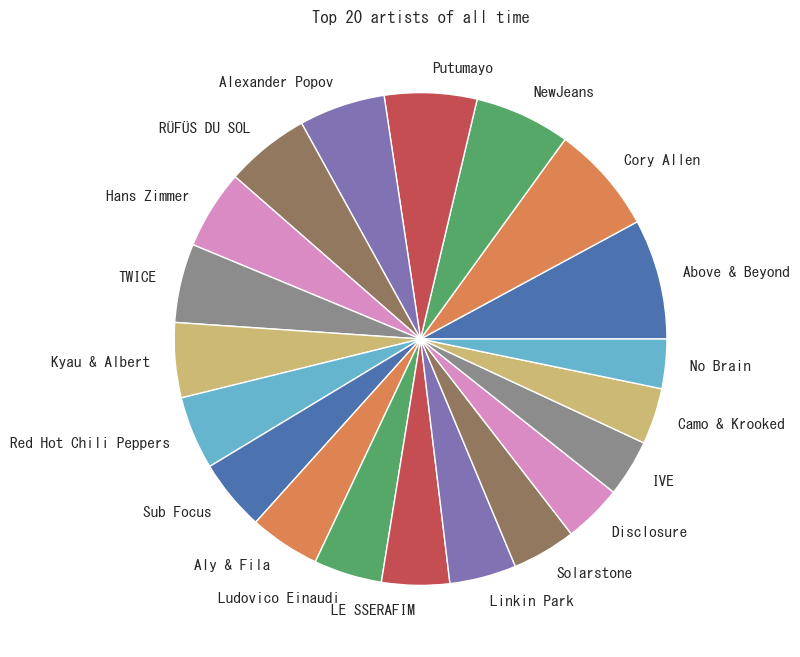

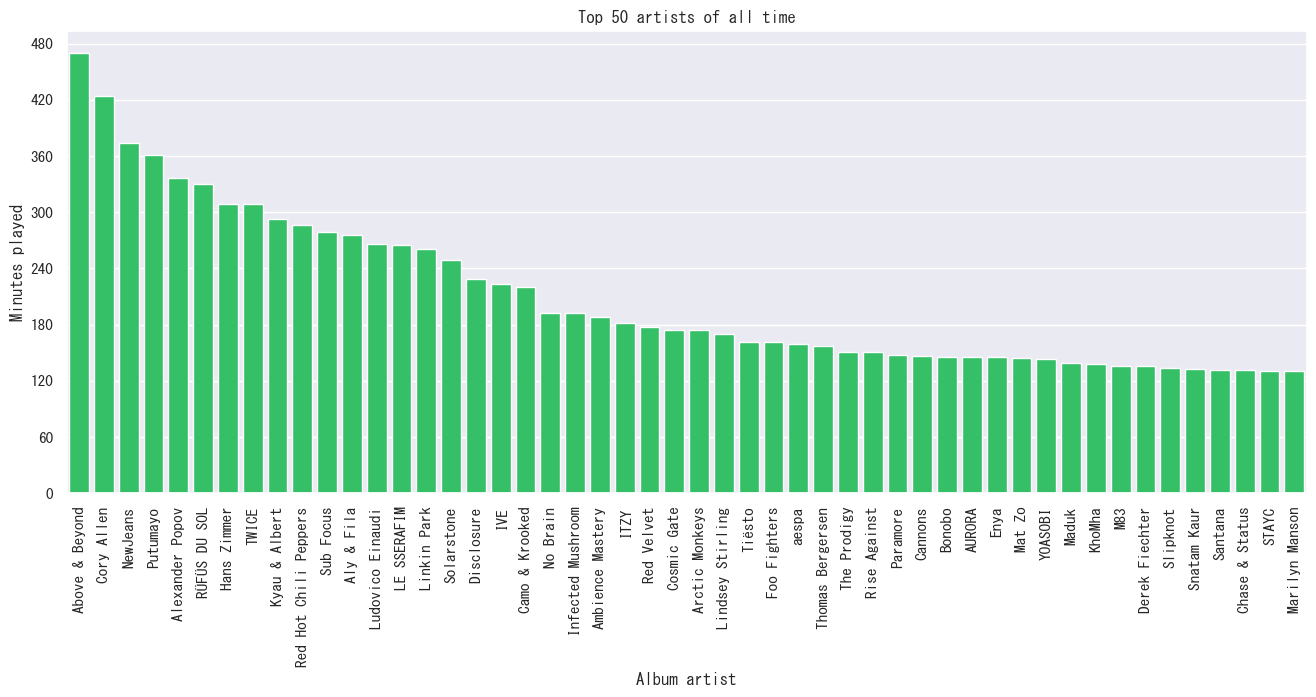

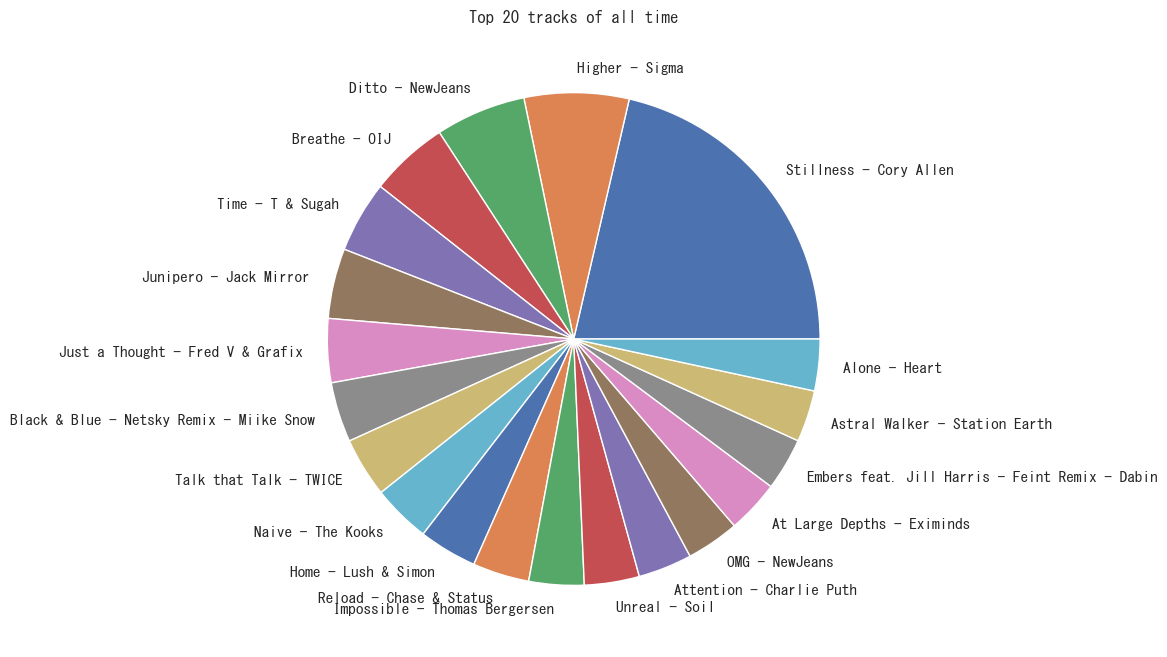

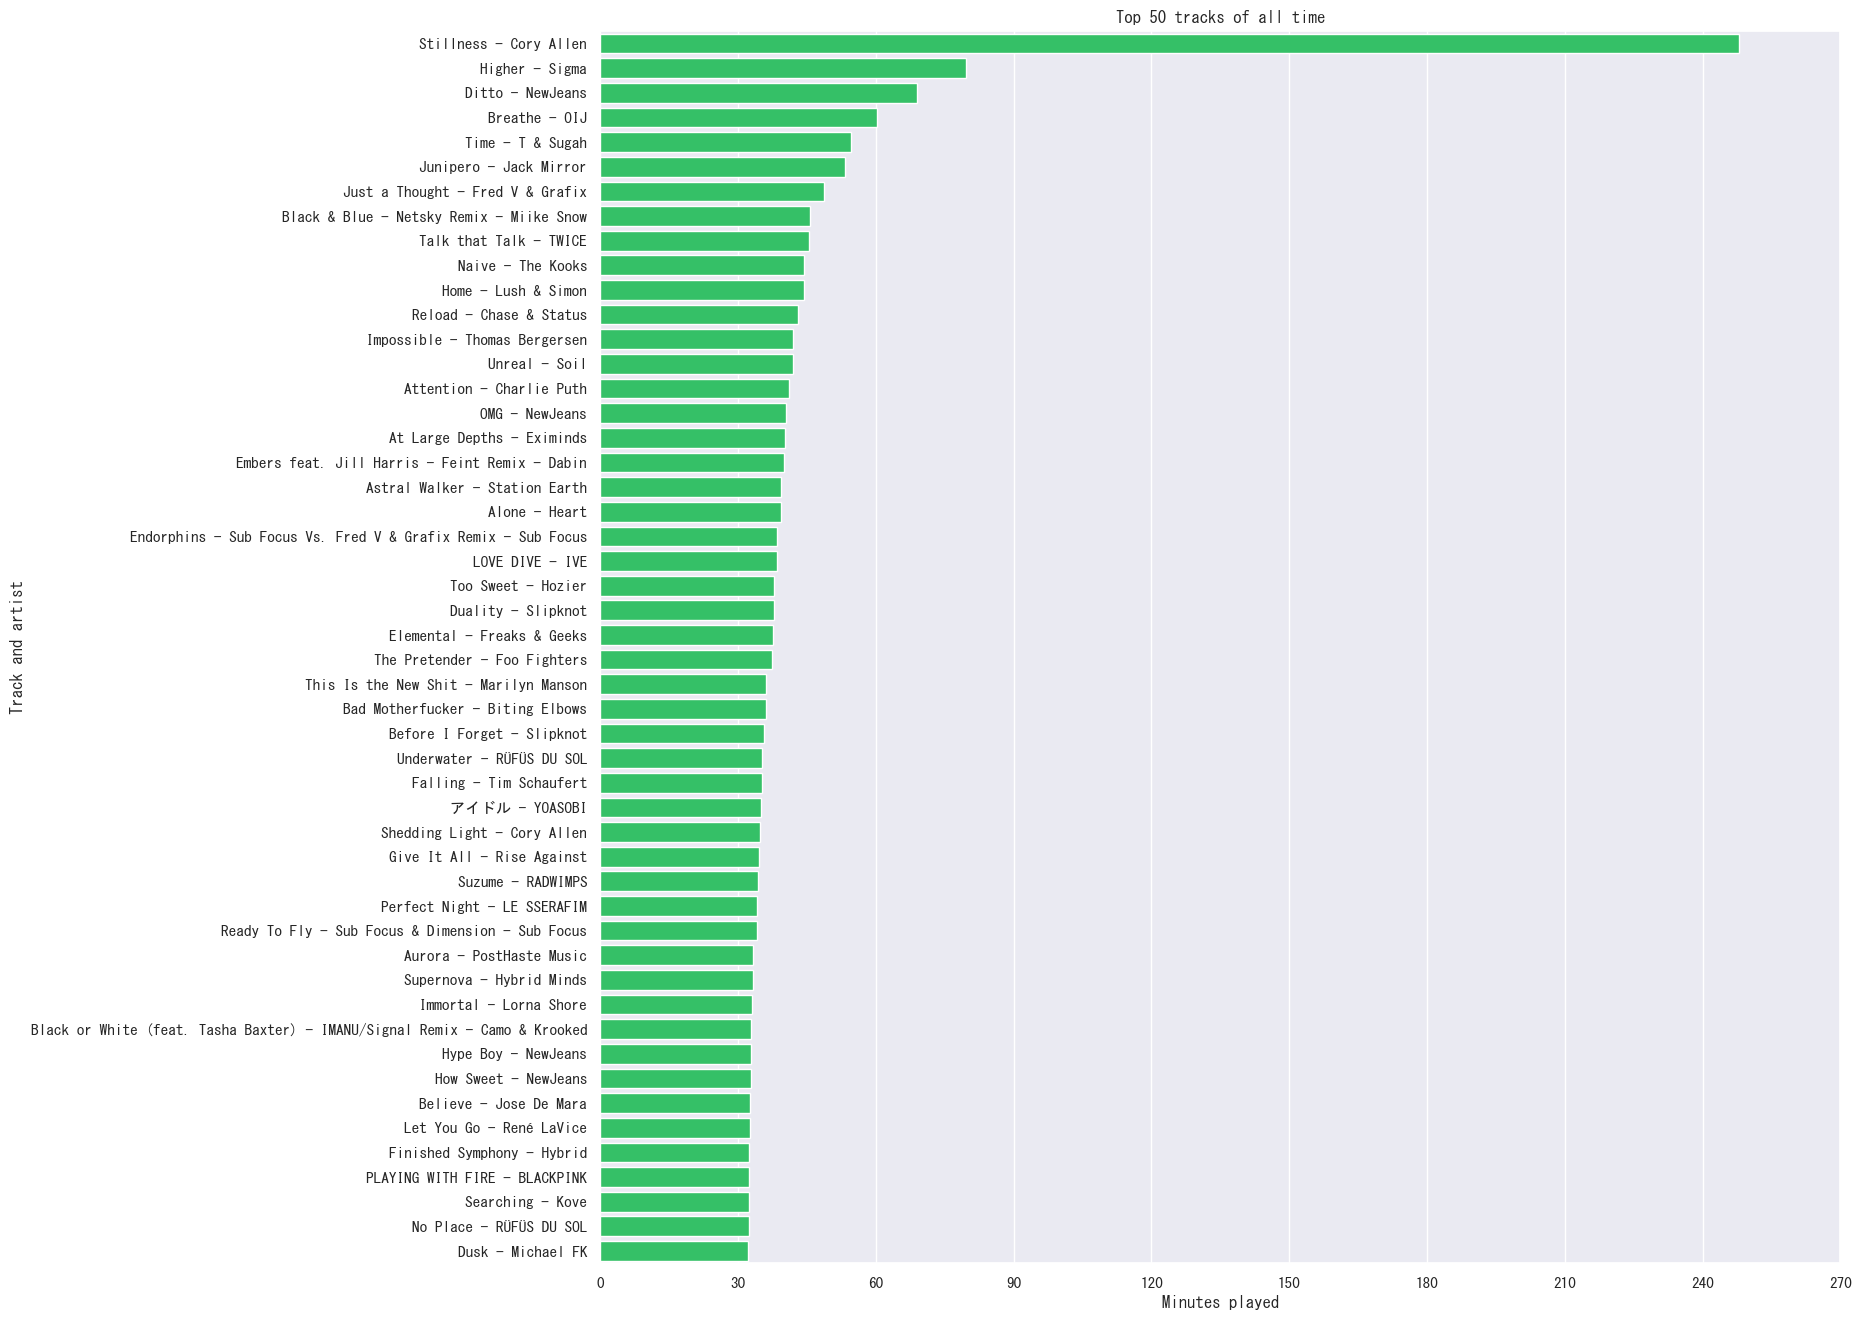

In [59]:
year = 0

if year == 0:
    temp = df
    plot_title = 'of all time'
else:
    temp = df[df.ts.dt.year == year]
    plot_title = f'of {year}'

artists = (temp[['album_artist_name', 'ms_played']].groupby('album_artist_name').sum().sort_values('ms_played', ascending=False).rename(columns={'ms_played':'Minutes played'})/1000/60).reset_index().rename(columns={'album_artist_name':'Album artist'})
# artists.loc[len(artists)] = ['Others', (temp.ms_played.sum()/1000/60) - (artists.mins_played.sum())]
plt.figure(figsize=(10,8))
plt.title(f'Top 20 artists {plot_title}')
plt.pie(artists[:20]['Minutes played'], labels=artists[:20]['Album artist'])
plt.show()
plt.figure(figsize=(16,6))
plt.title(f'Top 50 artists {plot_title}')
sns.barplot(artists[:50], x='Album artist', y='Minutes played', color='#1ED760')
plt.yticks(range(0,500,60))
plt.xticks(rotation=90)
plt.show()
# display(artists)

tracks = temp.groupby('track_name').agg({'ms_played':'sum', 'album_artist_name':'first'}).reset_index().assign(title=lambda x: x['track_name'] + ' - ' + x['album_artist_name']).drop(columns=['track_name', 'album_artist_name']).assign(mins_played=lambda x: x['ms_played']/1000/60).drop(columns='ms_played').rename(columns={'title':'Track and artist', 'mins_played':'Minutes played'}).sort_values('Minutes played', ascending=False)
# tracks.loc[len(artists)] = ['Others', (temp.ms_played.sum()/1000/60) - (tracks.mins_played.sum())]
plt.figure(figsize=(10,8))
plt.title(f'Top 20 tracks {plot_title}')
plt.pie(tracks[:20]['Minutes played'], labels=tracks[:20]['Track and artist'])
plt.show()
plt.figure(figsize=(16,16))
plt.title(f'Top 50 tracks {plot_title}')
sns.barplot(tracks[:50], y='Track and artist', x='Minutes played', orient='h', color='#1ED760')
plt.xticks(range(0,271,30))
plt.show()
# display(tracks)


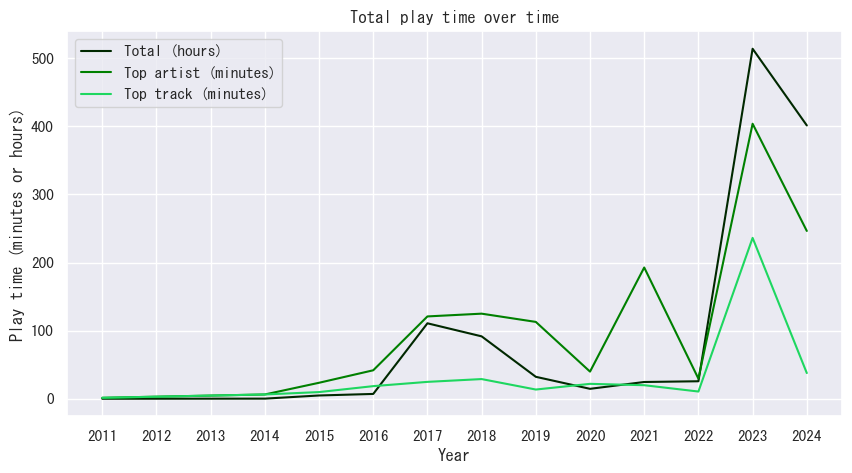

,Hours played
Year,
2011,0.124481
2014,0.299285
2015,4.922413
2016,7.193754
2017,110.859160
2018,91.694182
2019,32.320225
2020,14.691623
2021,24.724044


,Album artist,Minutes played
Year,,
2011,LL COOL J,1.513817
2014,Tarentel,6.403333
2015,Leo de la Rosa,23.577833
2016,Hans Zimmer,41.905550
2017,Camo & Krooked,120.946200
2018,AURORA,124.998050
2019,Iron Maiden,112.900817
2020,Pink Floyd,39.943933
2021,No Brain,192.733333


,Track name,Album artist,Minutes played
Year,,,
2011,Phenomenon,LL COOL J,1.513817
2014,Two Sides of Myself Part One,Tarentel,6.403333
2015,El Amor Es Sentir,Jesus Mondejar,9.921667
2016,Free Bird,Lynyrd Skynyrd,18.631100
2017,Embargo,DC Breaks,24.892217
2018,Night - Doublepoint Remix,Ludovico Einaudi,29.003100
2019,Rime of the Ancient Mariner - 2015 Remaster,Iron Maiden,13.644883
2020,Stir It Up,Bob Marley & The Wailers,21.997067
2021,In front of city hall at the subway station,Kwak Jin Eon,19.997267


In [67]:
totals = []
artists = []
tracks = []

years = df.ts.dt.year.unique()

for year in years:
    temp = df[df.ts.dt.year == year]

    total = pd.DataFrame({'Year':year, 'Hours played':[temp.ms_played.sum()/1000/60/60]})
    totals.append(total)

    artist = (temp[['album_artist_name', 'ms_played']].groupby('album_artist_name').sum().sort_values('ms_played', ascending=False).rename(columns={'ms_played':'Minutes played'})/1000/60).reset_index().rename(columns={'album_artist_name':'Album artist', 'ms_played':'Minutes played'})[0:1]
    artist['Year'] = year
    artists.append(artist)

    track = temp.groupby('track_name').agg({'ms_played':'sum', 'album_artist_name':'first'}).assign(mins_played=lambda x: x['ms_played']/1000/60).drop(columns='ms_played').sort_values('mins_played', ascending=False).reset_index().rename(columns={'album_artist_name':'Album artist', 'track_name':'Track name', 'mins_played':'Minutes played'})[0:1]
    track['Year'] = year
    tracks.append(track)

totals_df = pd.concat(totals, axis=0).set_index('Year')
artists_df = pd.concat(artists, axis=0).set_index('Year')
tracks_df = pd.concat(tracks, axis=0).set_index('Year')

plt.figure(figsize=(10,5))
plt.title('Total play time over time')
sns.lineplot(totals_df['Hours played'], label='Total (hours)', color='#002800')
# plt.xticks(range(years[0], years[-1]+1))
# plt.legend(loc='upper left')
# plt.show()
sns.lineplot(artists_df['Minutes played'], label='Top artist (minutes)', color='#008000')
sns.lineplot(tracks_df['Minutes played'], label='Top track (minutes)', color='#1ED760')
plt.ylabel('Play time (minutes or hours)')
plt.xticks(range(years[0], years[-1]+1))
plt.legend(loc='upper left')
plt.show()

display(totals_df)
display(artists_df)
display(tracks_df)

Top 50 artists in 2024 but not in 2023: Kyau & Albert, Ambience Mastery, RÜFÜS DU SOL, Enya, KhoMha, Federico Aubele, Cosmic Gate, Aly & Fila, Christopher Galovan, Arctic Monkeys, Eximinds, Miles Davis, The Blizzard, Ali Wilson, LiSA, Maduk, Mat Zo, IU, Amy Winehouse, Tiësto, Eugenio Tokarev, Die Antwoord, Lange, Gibran Alcocer, deadmau5, Masakatsu Takagi, KISS OF LIFE, Poranguí, Mrs. GREEN APPLE, Etherwood, Friction, Nick Phoenix, Underworld (33)
Top 50 artists in 2023 but not in 2024: Cory Allen, Cannons, Rise Against, Red Velvet, Paramore, STAYC, Lindsey Stirling, ONE OK ROCK, (G)I-DLE, BLACKPINK, Ellie Goulding, Sleep Token, Parov Stelar, Daft Punk, Muse, RADWIMPS, Foo Fighters, X-Ray Dog, M83, PianoDeuss, Russkaja, BIBI, Slipknot, Andrew Bayer, NMIXX, Bob Moses, Celldweller, Pendulum, Derek Fiechter, Biting Elbows, BICEP, The Heavy, OFFICIAL HIGE DANDISM (33)


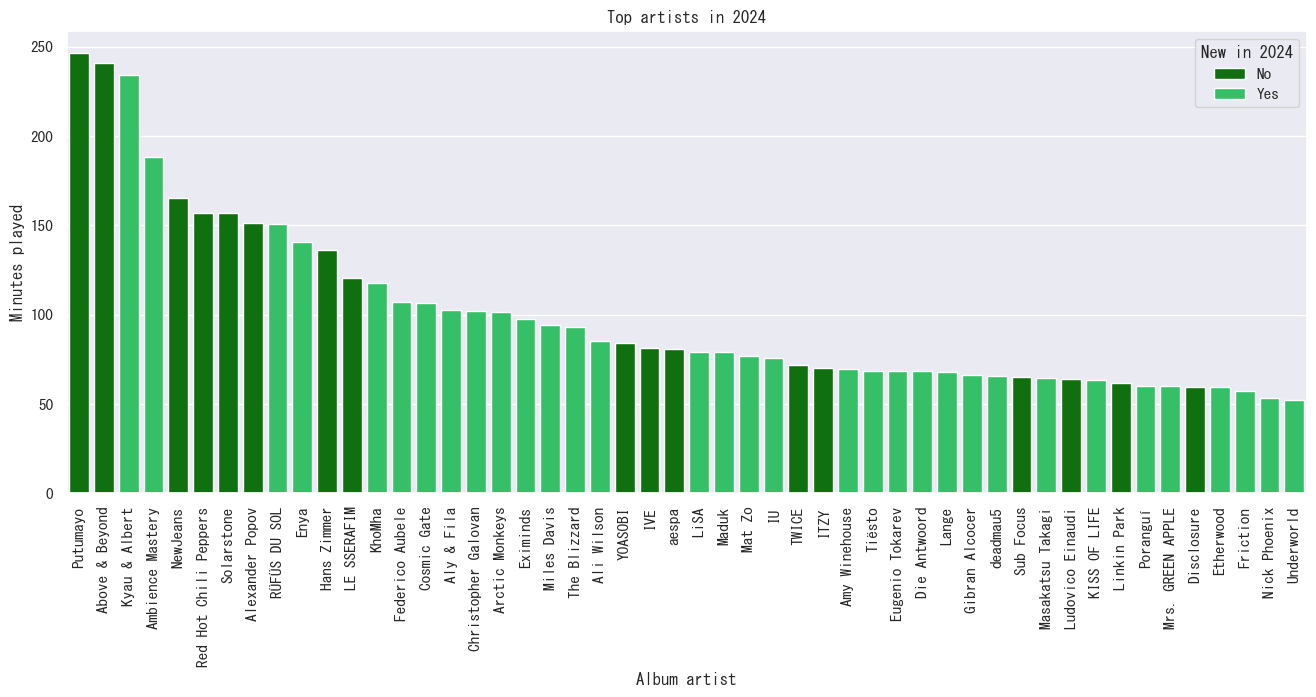

In [64]:
data_2023 = df[df.ts.dt.year == 2023]
data_2024 = df[df.ts.dt.year == 2024]

artists_2023 = data_2023[['album_artist_name', 'ms_played']].groupby('album_artist_name').sum().sort_values('ms_played', ascending=False).reset_index().drop(columns='ms_played')[:50]['album_artist_name'].to_list()
artists_2024 = data_2024[['album_artist_name', 'ms_played']].groupby('album_artist_name').sum().sort_values('ms_played', ascending=False).reset_index().drop(columns='ms_played')[:50]['album_artist_name'].to_list()
artists_2024_not_2023 = [a for a in artists_2024[:50] if a not in artists_2023[:50]]
artists_2023_not_2024 = [a for a in artists_2023[:50] if a not in artists_2024[:50]]
print(f'Top 50 artists in 2024 but not in 2023: {', '.join(artists_2024_not_2023)} ({len(artists_2024_not_2023)})')
print(f'Top 50 artists in 2023 but not in 2024: {', '.join(artists_2023_not_2024)} ({len(artists_2023_not_2024)})')

artists = (data_2024[['album_artist_name', 'ms_played']].groupby('album_artist_name').sum().sort_values('ms_played', ascending=False).rename(columns={'ms_played':'Minutes played'})/1000/60).reset_index().rename(columns={'album_artist_name':'Album artist'})[:50]
artists['New in 2024'] = artists['Album artist'].apply(lambda x: 'Yes' if x in artists_2024_not_2023 else 'No')

plt.figure(figsize=(16,6))
plt.title('Top artists in 2024')
sns.barplot(artists, x='Album artist', y='Minutes played', hue='New in 2024', palette={'Yes':'#1ED760', 'No':'#008000'})
plt.xticks(rotation=90)
plt.show()

,Album artist,Skipped,Most played artist
1568,Ludovico Einaudi,40,Yes
1530,Linkin Park,35,Yes
2052,Poranguí,31,No
1119,ITZY,28,Yes
66,Above & Beyond,28,Yes
...,...,...,...
464,Cecilun Michel,1,No
3034,高坂麗奈,1,No
3033,飞雄67号,1,No
3032,面妹孔佳奇,1,No


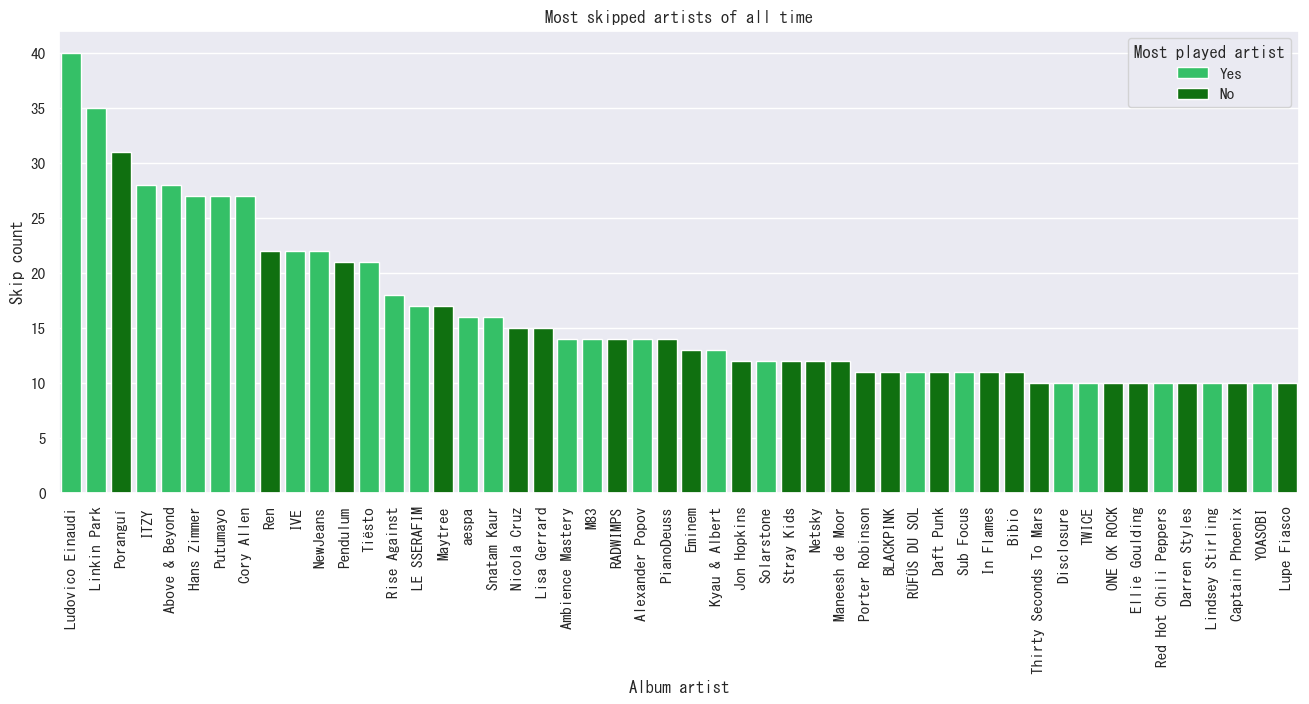

In [63]:
most_skipped = df[df.skipped==True][['album_artist_name', 'skipped']].groupby('album_artist_name').sum().reset_index().rename(columns={'album_artist_name':'Album artist', 'skipped':'Skipped'}).sort_values('Skipped', ascending=False)
most_skipped['Most played artist'] = most_skipped['Album artist'].apply(lambda x: 'Yes' if x in top_artists_all_time else 'No')

display(most_skipped)

plt.figure(figsize=(16,6))
plt.title('Most skipped artists of all time')
sns.barplot(most_skipped[:50], x='Album artist', y='Skipped', hue='Most played artist', palette={'Yes':'#1ED760', 'No':'#008000'})
plt.ylabel('Skip count')
plt.xticks(rotation=90)
plt.show()

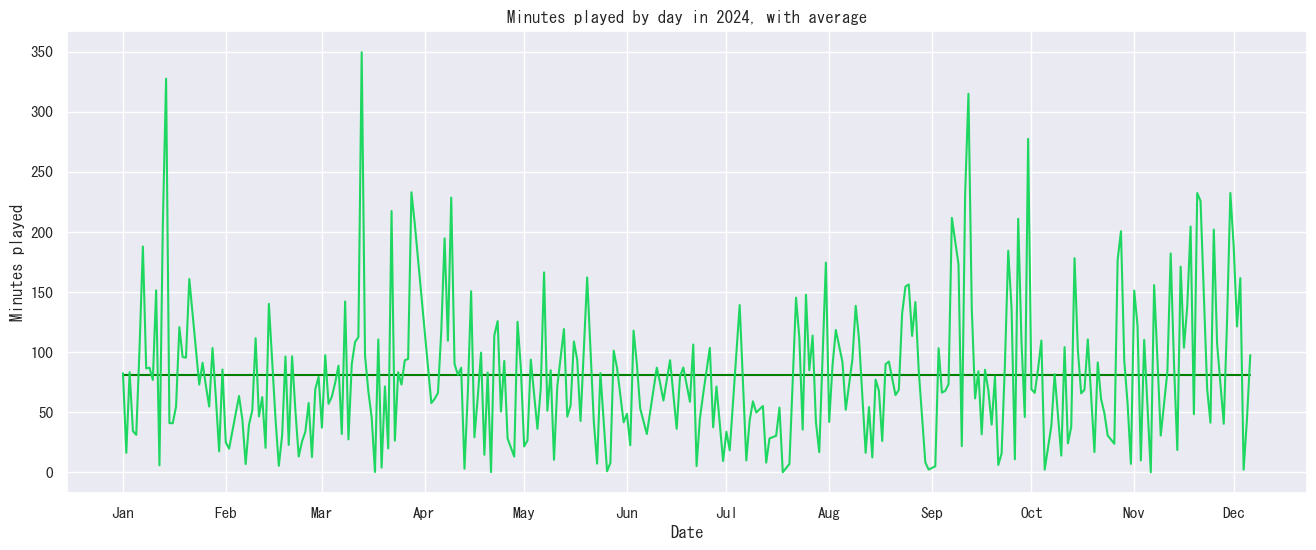

In [60]:
minutes_per_day_2024 = data_2024.groupby(data_2024.ts.dt.date)['ms_played'].sum()/1000/60
plt.figure(figsize=(16,6))
plt.title('Minutes played by day in 2024, with average')
sns.lineplot(x=minutes_per_day_2024.index, y=minutes_per_day_2024.mean(), c='#008000')
sns.lineplot(minutes_per_day_2024, color='#1ED760')
plt.ylabel('Minutes played')
plt.xlabel('Date')
monthly_ticks = pd.date_range(start=minutes_per_day_2024.index[0], end=minutes_per_day_2024.index[-1], freq='MS')
plt.xticks(monthly_ticks, [tick.strftime('%b') for tick in monthly_ticks])
plt.show()

In [57]:
data_2024[data_2024.ts.dt.date == minutes_per_day_2024.sort_values(ascending=False).index[0]][['ms_played','track_name','album_artist_name','album_album_name']].groupby('track_name').agg({'ms_played':'sum', 'album_artist_name':'first', 'album_album_name':'first'}).assign(mins_played=lambda x: x['ms_played']/1000/60).drop(columns='ms_played').sort_values('mins_played', ascending=False).reset_index()

,track_name,album_artist_name,album_album_name,mins_played
0,"All Blues (feat. John Coltrane, Cannonball Add...",Miles Davis,Kind Of Blue,11.554217
1,At Large Depths,Eximinds,At Large Depths,10.256000
2,"Freddie Freeloader (feat. John Coltrane, Canno...",Miles Davis,Kind Of Blue,9.774867
3,Big Sky - Original Mix,John O'Callaghan,Big Sky,9.538450
4,Magia (ASOT 1054),KhoMha,ASOT 1054 - A State Of Trance Episode 1054,9.422300
...,...,...,...,...
67,Love Theme Dusk [ASOT 229] - Mike’s Broken Rec...,Mike Foyle,A State Of Trance Episode 229 (Year Mix 2005),1.934333
68,Solar Wind,Alexander Popov,Personal Way,1.411600
69,The Dark Knight (Mixed),KhoMha,A State Of Trance Showcase - Mix 013: KhoMha,1.276933
70,Piece Of Art (Mixed),Kryder,A State Of Trance Year Mix 2022 - Mixed by Arm...,1.261983


In [55]:
data_2024[data_2024.ts.dt.date == minutes_per_day_2024.sort_values(ascending=False).index[0]][['ms_played','track_name','album_artist_name','album_album_name']].groupby('track_name').agg({'ms_played':'sum', 'album_artist_name':'first', 'album_album_name':'first'}).assign(mins_played=lambda x: x['ms_played']/1000/60).drop(columns='ms_played')['mins_played'].mean()

np.float64(4.855098842592593)